<a href="https://colab.research.google.com/github/MasoudMoeini/Image-blur-detection/blob/main/image_blur_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
from keras.preprocessing.image import image
from keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt

In [10]:
img = image.load_img('image/motion0001.jpg',target_size = (224, 224))

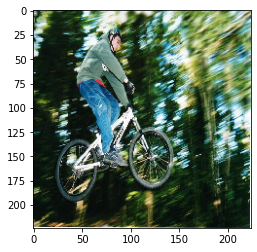

In [11]:
plt.imshow(img)

In [12]:
img = image.img_to_array(img)

In [13]:
img = np.expand_dims(img, axis=0)

In [14]:
img = preprocess_input(img)

In [15]:
model = ResNet50(weights='imagenet')

102981632/102967424 [==============================] - 1s 0us/step


In [16]:
preds = model.predict(img)

In [17]:
print('Predicted:', decode_predictions(preds, top=1)[0])

49152/35363 [=========================================] - 0s 0us/step
Predicted: [('n03792782', 'mountain_bike', 0.9689636)]
